In [2]:
using PolyharmonicSplines
using PyPlot

# Polyharmonic Splines
Polyharmonic splines are used for function approximation and data interpolation. They are very useful for interpolation of scattered data in many dimensions. A special case ($k=2$) are thin plate splines.

The basis functions of polyharmonic splines are radial basis functions of the form:

$$ 
\begin{matrix}
\phi(r) = \begin{cases}
               r^k \qquad \quad \,\mbox{with } k=1,3,5,\dots, \\
                r^k \ln(r) \quad \mbox{with } k=2,4,6,\dots
            \end{cases} \\[5mm]
   r = ||\mathbf{x} - \mathbf{c}_i||_2 
    = \sqrt{ (\mathbf{x} - \mathbf{c}_i)^T \, (\mathbf{x} - \mathbf{c}_i) }
\end{matrix}
$$

## 1D Splines

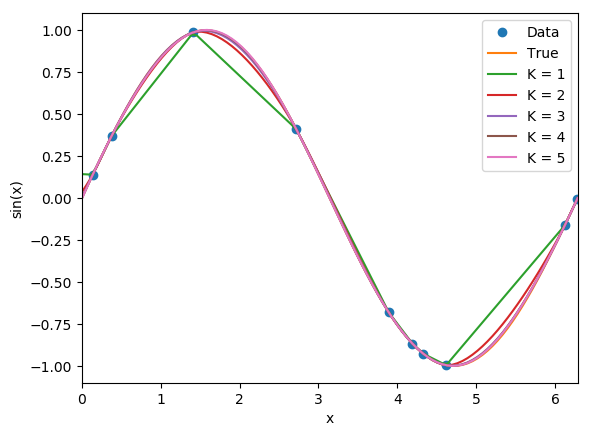

PyObject <matplotlib.legend.Legend object at 0x18387a128>

In [6]:
x = 2pi*rand(10)
y = sin.(x)

S = [PolyharmonicSpline(k,x,y) for k=1:5]

fig, ax = plt.subplots()
xx = range(0,2pi,length=100)
ax.plot(x, y,"o",label="Data")
ax.plot(xx, sin.(xx),label="True")
for k=1:5
    ax.plot(xx, S[k].(xx), label="K = $k")
end
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.set_xlim(0,2pi)
ax.legend()

## 1D Smoothed Splines

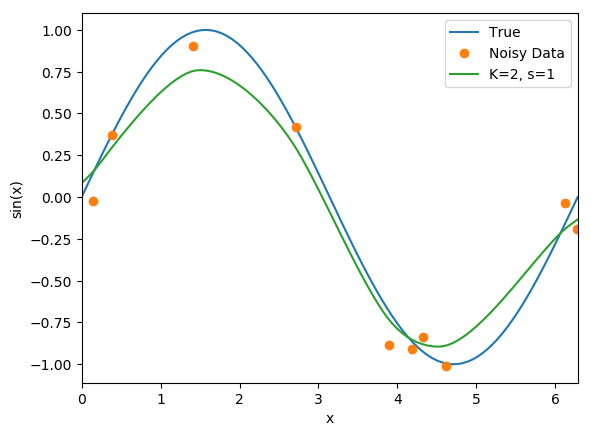

PyObject <matplotlib.legend.Legend object at 0x183ccacc0>

In [9]:
yn = y .+ 0.1*randn(10)
S2n = PolyharmonicSpline(2,x,yn,s=1)

fig, ax = plt.subplots()
ax.plot(xx, sin.(xx),label="True")
ax.plot(x, yn,"o",label="Noisy Data")
ax.plot(xx, S2n.(xx),label="K=2, s=1")

ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.set_xlim(0,2pi)
ax.legend()

## 2D Splines

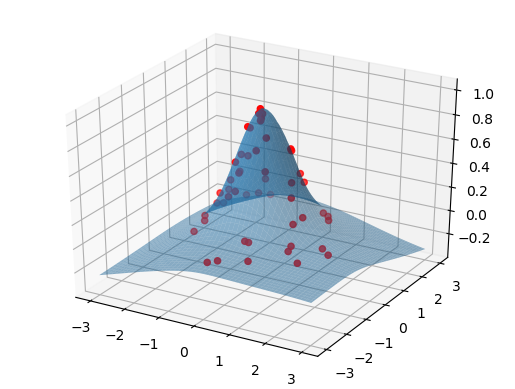

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x1830bb710>

In [12]:
x,y = randn(50),randn(50)
z = exp.(-(x.^2 .+ y.^2))

S2 = PolyharmonicSpline(2,[x y],z)

n=100
xgrid = ones(n)*LinRange(-3,3,n)'
ygrid = LinRange(-3,3,n)*ones(n)'

xx = reshape(xgrid,n*n)
yy = reshape(ygrid,n*n)

zz = S2.(xx,yy)
zgrid = reshape(zz,n,n);

plot_surface(xgrid,ygrid,zgrid,alpha=0.5)
scatter3D(x,y,z,color="r")